# Sleep Summary Statistics

In [32]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
plt.style.use('seaborn-colorblind')
sns.set_palette('Set1')
sns.set_style("white")
# plt.rcParams['image.cmap'] = 'Set1'

In [2]:
sleepDayFiles = glob.glob('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/*sleepDay*')

In [3]:
subject = '10011'
sleepLogInfoFile = glob.glob('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_%s_*sleepLogInfo*' % subject)
sleepLogInfoFile

['/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10011_sleepLogInfo_20190901_20201020.csv']

In [4]:
sleepSumStats = pd.DataFrame()
for file in sleepDayFiles:
    subject = os.path.basename(file).split('_sleepDay')[0][-5:]

    sleepDay = pd.read_csv(file)
    sleepDay['subject'] = subject
    
    sleepLogInfoFile = glob.glob('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_%s_*sleepLogInfo*' % subject)
    sleepLog = pd.read_csv(sleepLogInfoFile[0])
    sleepLog['subject'] = subject
    
    sleepDay['date'] = pd.to_datetime(sleepDay['SleepDay'])
    sleepLog['date'] = pd.to_datetime(sleepLog['StartTime']).round('D')
    
    d1 = pd.merge(sleepDay, sleepLog, on = ['subject', 'date'])
    sleepSumStats = sleepSumStats.append(d1)

sleepSumStats = sleepSumStats.drop(['TotalSleepRecords', 'LogId', 'SleepDay', 'IsMainSleep'], axis=1)

In [5]:
sleepSumStats

,TotalMinutesAsleep,TotalTimeInBed,subject,date,StartTime,Duration,Efficiency,MinutesAfterWakeup,MinutesAsleep,MinutesToFallAsleep,TimeInBed,AwakeCount,AwakeDuration,RestlessCount,RestlessDuration
0,508,556,10011,2019-10-25,10/24/2019 8:51:00 PM,33360000,91,0,508,0,556,2,4,8,23
1,450,488,10011,2019-11-04,11/3/2019 9:57:30 PM,29280000,92,0,450,0,488,3,3,21,35
2,480,544,10011,2019-11-05,11/4/2019 9:04:30 PM,32640000,88,0,480,0,544,6,10,27,54
3,405,429,10011,2019-11-06,11/5/2019 10:41:30 PM,25740000,94,0,405,0,429,2,2,11,22
4,373,404,10011,2019-11-07,11/6/2019 11:17:00 PM,24240000,93,2,373,0,404,2,8,13,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,351,418,20157,2020-10-15,10/15/2020 12:05:00 AM,25080000,84,0,351,0,418,3,7,23,60
7,315,356,20157,2020-10-16,10/16/2020 12:08:00 AM,21360000,89,4,315,0,356,3,3,16,38
8,570,628,20157,2020-10-17,10/17/2020 12:03:00 AM,37680000,91,0,570,0,628,5,6,21,52
9,347,403,20157,2020-10-18,10/18/2020 2:29:00 AM,24180000,86,0,347,0,403,7,8,18,48


Also need to get the data from Fitbit devices collected through Beiwe system.

In [6]:
homeDir = '/Users/megmcmahon/'
dataDir = homeDir + 'Box/Megan Fitbit data/'
beiweFiles = glob.glob(dataDir + '*.zip')
beiweFiles

['/Users/megmcmahon/Box/Megan Fitbit data/105-y5aoxrex.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/11-8fahydu5.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/151-rnqghrr3.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/152-8u6hspqt.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/163-6eveypa6.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/164-abdufk3q.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/168-udn1776i.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/176-oadg9rq9.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/177-gstmc6r8.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/178-9gl9sngt.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/180-j9l84tcr.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/181-2d73xoto.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/182-as9npqdc.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/184-t9w69clk.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/23-mzhdeiz8.zip',
 '/Users/megmcmahon/Box/Megan Fitbit data/45-k1pmzgyx.zip',
 '/Users/megmcmahon/Box/Meg

In [7]:
sleepLog.columns

Index(['LogId', 'StartTime', 'Duration', 'Efficiency', 'IsMainSleep',
       'MinutesAfterWakeup', 'MinutesAsleep', 'MinutesToFallAsleep',
       'TimeInBed', 'AwakeCount', 'AwakeDuration', 'RestlessCount',
       'RestlessDuration', 'subject', 'date'],
      dtype='object')

In [8]:
import zipfile
BeiweSleepStats = pd.DataFrame()

for fileName in beiweFiles:
    print(fileName)
    subNum = fileName.split('data/')[1].split('-')[0]
    subDir = dataDir + subNum

    with zipfile.ZipFile(fileName, 'r') as zip_ref:
        zip_ref.extractall(subDir)

        # read intraday csv
        d = pd.read_csv(subDir + '/fitbit_daily_records.csv')
        d = d['sleep'].dropna()
        
        date =[eval(x)[0].get('dateOfSleep') for x in d if x]
        Duration = [eval(x)[0].get('duration') for x in d if x]
        TimeInBed = [eval(x)[0].get('timeInBed') for x in d if x]
        Efficiency = [eval(x)[0].get('efficiency') for x in d if x]
        MinutesAsleep = [eval(x)[0].get('minutesAsleep') for x in d if x]
        MinutesToFallAsleep = [eval(x)[0].get('minutesToFallAsleep') for x in d if x]
        AwakeDuration = [eval(x)[0].get('minutesAwake') for x in d if x]

        d1 = pd.DataFrame(list(zip(date, Duration, TimeInBed, Efficiency, MinutesAsleep, MinutesToFallAsleep, AwakeDuration)), columns = ['date', 'Duration', 'TimeInBed', 'Efficiency', 'MinutesAsleep', 'MinutesToFallAsleep', 'AwakeDuration'])
        d1['subject'] = subNum
        BeiweSleepStats = BeiweSleepStats.append(d1)


/Users/megmcmahon/Box/Megan Fitbit data/105-y5aoxrex.zip
/Users/megmcmahon/Box/Megan Fitbit data/11-8fahydu5.zip
/Users/megmcmahon/Box/Megan Fitbit data/151-rnqghrr3.zip
/Users/megmcmahon/Box/Megan Fitbit data/152-8u6hspqt.zip
/Users/megmcmahon/Box/Megan Fitbit data/163-6eveypa6.zip
/Users/megmcmahon/Box/Megan Fitbit data/164-abdufk3q.zip
/Users/megmcmahon/Box/Megan Fitbit data/168-udn1776i.zip
/Users/megmcmahon/Box/Megan Fitbit data/176-oadg9rq9.zip
/Users/megmcmahon/Box/Megan Fitbit data/177-gstmc6r8.zip
/Users/megmcmahon/Box/Megan Fitbit data/178-9gl9sngt.zip
/Users/megmcmahon/Box/Megan Fitbit data/180-j9l84tcr.zip
/Users/megmcmahon/Box/Megan Fitbit data/181-2d73xoto.zip
/Users/megmcmahon/Box/Megan Fitbit data/182-as9npqdc.zip
/Users/megmcmahon/Box/Megan Fitbit data/184-t9w69clk.zip
/Users/megmcmahon/Box/Megan Fitbit data/23-mzhdeiz8.zip
/Users/megmcmahon/Box/Megan Fitbit data/45-k1pmzgyx.zip
/Users/megmcmahon/Box/Megan Fitbit data/76-oxufrfto.zip


In [9]:
BeiweSleepStats

,date,Duration,TimeInBed,Efficiency,MinutesAsleep,MinutesToFallAsleep,AwakeDuration,subject
0,2020-12-02,27480000,458,97,400,0,58,105
1,2020-12-03,27480000,458,97,411,0,47,105
2,2020-12-04,27660000,461,96,430,0,31,105
3,2020-12-05,26580000,443,97,398,0,45,105
4,2020-12-06,31260000,521,98,478,0,43,105
...,...,...,...,...,...,...,...,...
6,2020-11-27,38940000,649,98,569,0,80,45
7,2020-11-28,31980000,533,97,465,0,68,45
8,2020-11-29,36000000,600,96,540,0,60,45
9,2020-11-30,30420000,507,98,438,0,69,45


In [10]:
BeiweSleepStats['date'] = pd.to_datetime(BeiweSleepStats['date'])
fitSleepStats = pd.merge(sleepSumStats, BeiweSleepStats, how='outer', copy=False)
fitSleepStats['subject'] = fitSleepStats['subject'].astype(int)

In [11]:
fitSleepStats

,TotalMinutesAsleep,TotalTimeInBed,subject,date,StartTime,Duration,Efficiency,MinutesAfterWakeup,MinutesAsleep,MinutesToFallAsleep,TimeInBed,AwakeCount,AwakeDuration,RestlessCount,RestlessDuration
0,508,556,10011,2019-10-25,10/24/2019 8:51:00 PM,33360000.0,91.0,0,508.0,0.0,556.0,2,4.0,8,23
1,450,488,10011,2019-11-04,11/3/2019 9:57:30 PM,29280000.0,92.0,0,450.0,0.0,488.0,3,3.0,21,35
2,480,544,10011,2019-11-05,11/4/2019 9:04:30 PM,32640000.0,88.0,0,480.0,0.0,544.0,6,10.0,27,54
3,405,429,10011,2019-11-06,11/5/2019 10:41:30 PM,25740000.0,94.0,0,405.0,0.0,429.0,2,2.0,11,22
4,373,404,10011,2019-11-07,11/6/2019 11:17:00 PM,24240000.0,93.0,2,373.0,0.0,404.0,2,8.0,13,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,NaN,NaN,45,2020-11-27,NaN,38940000.0,98.0,NaN,569.0,0.0,649.0,NaN,80.0,NaN,NaN
715,NaN,NaN,45,2020-11-28,NaN,31980000.0,97.0,NaN,465.0,0.0,533.0,NaN,68.0,NaN,NaN
716,NaN,NaN,45,2020-11-29,NaN,36000000.0,96.0,NaN,540.0,0.0,600.0,NaN,60.0,NaN,NaN
717,NaN,NaN,45,2020-11-30,NaN,30420000.0,98.0,NaN,438.0,0.0,507.0,NaN,69.0,NaN,NaN


In [12]:
sleepSummary = fitSleepStats.groupby('subject', dropna=True).mean()

In [13]:
sleepSummary.to_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/sleepSummaryMetrics.csv')

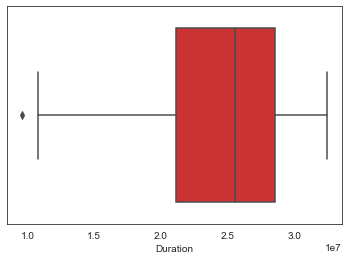

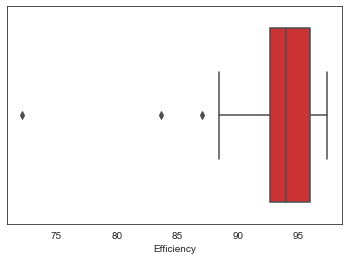

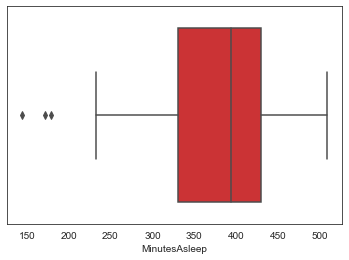

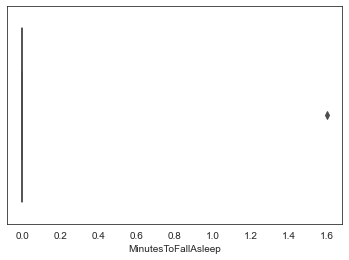

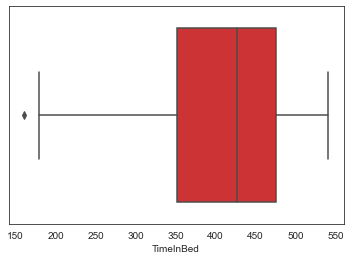

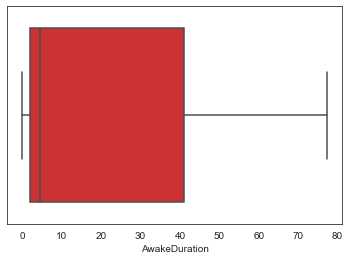

In [14]:
for column in sleepSummary:
    plt.figure()
    sns.boxplot(sleepSummary[column])

# Compare to Actiwatch sleep summary metrics

In [52]:
actSleepStats = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/wa_act_combined.csv')

actSleepStats = actSleepStats[(actSleepStats['interval_type'] == 'SLEEP') | (actSleepStats['interval_type'] == 'REST') ]
actSleepStats['duration'] = actSleepStats['duration'].ffill(limit=1)
actSleepStats = actSleepStats[(actSleepStats['interval_type'] == 'SLEEP')]

actSleepStats['subject'] = actSleepStats['subject_id'].astype(int)

actSleepStats = actSleepStats[['subject', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'total_ac', 'onset_latency', 'efficiency',
       'wake_time', 'percent_wake', 'sleep_time', 'percent_sleep',
       'percent_immobile', 'fragmentation']]

actSleepStats['date'] = actSleepStats['start_date'] + " " + actSleepStats['start_time']
actSleepStats['date'] = pd.to_datetime(actSleepStats['date']).round('D')

actSleepStats.columns = ['subject', 'start_date', 'start_time',
       'end_date', 'end_time', 'TimeInBed', 'total_ac', 'MinutesToFallAsleep', 'Efficiency',
       'AwakeDuration', 'percent_wake', 'MinutesAsleep', 'percent_sleep',
       'percent_immobile', 'fragmentation', 'date']

cols = ['TimeInBed', 'total_ac', 'MinutesToFallAsleep', 'Efficiency', 'AwakeDuration', 'percent_wake', 'MinutesAsleep', 'percent_sleep', 'percent_immobile', 'fragmentation']

actSleepStats[cols] = actSleepStats[cols].apply(pd.to_numeric, errors='coerce')

In [53]:
actSleepStats

,subject,start_date,start_time,end_date,end_time,TimeInBed,total_ac,MinutesToFallAsleep,Efficiency,AwakeDuration,percent_wake,MinutesAsleep,percent_sleep,percent_immobile,fragmentation,date
39,10011,10/24/2019,8:55:00 PM,10/25/2019,6:07:00 AM,552.0,12923.0,5.0,85.02,78.0,14.13,474.0,85.87,89.13,14.57,2019-10-25
40,10011,10/25/2019,10:42:30 PM,10/26/2019,6:44:30 AM,482.0,8935.0,4.0,88.07,46.5,9.65,435.5,90.35,92.95,7.05,2019-10-26
41,10011,10/26/2019,10:11:00 PM,10/27/2019,7:09:30 AM,538.5,6240.0,12.5,89.85,43.0,7.99,495.5,92.01,93.59,18.31,2019-10-27
42,10011,10/28/2019,12:17:30 AM,10/28/2019,5:57:30 AM,340.0,4911.0,8.0,89.96,26.5,7.79,313.5,92.21,92.35,14.79,2019-10-28
43,10011,10/28/2019,11:29:00 PM,10/29/2019,6:02:00 AM,393.0,4410.0,7.0,90.51,30.5,7.76,362.5,92.24,93.26,6.74,2019-10-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,20184,12/18/2020,7:24:30 PM,12/19/2020,6:08:00 AM,643.5,27140.0,0.0,85.37,89.0,13.83,554.5,86.17,81.66,38.73,2020-12-19
4025,20184,12/19/2020,10:56:00 PM,12/20/2020,6:39:30 AM,463.5,4532.0,13.0,90.25,33.0,7.12,430.5,92.88,94.07,8.87,2020-12-20
4026,20184,12/20/2020,10:01:30 PM,12/21/2020,6:00:00 AM,478.5,5498.0,22.5,88.04,37.0,7.73,441.5,92.27,90.60,27.59,2020-12-21
4027,20184,12/21/2020,10:05:30 PM,12/22/2020,6:09:00 AM,483.5,7124.0,2.5,90.68,41.0,8.48,442.5,91.52,92.76,13.69,2020-12-22


In [18]:
fitSleepStats.dtypes

TotalMinutesAsleep             object
TotalTimeInBed                 object
subject                         int64
date                   datetime64[ns]
StartTime                      object
Duration                      float64
Efficiency                    float64
MinutesAfterWakeup             object
MinutesAsleep                 float64
MinutesToFallAsleep           float64
TimeInBed                     float64
AwakeCount                     object
AwakeDuration                 float64
RestlessCount                  object
RestlessDuration               object
dtype: object

In [55]:
fitSleepStats['device'] = 'Fitbit'
actSleepStats['device'] = 'Actiwatch 2.0'


In [56]:
sleepStats = pd.concat([actSleepStats, fitSleepStats]).sort_values(by = ['subject', 'date'], ignore_index=True).set_index('subject')


In [57]:
sleepStats

,start_date,start_time,end_date,end_time,TimeInBed,total_ac,MinutesToFallAsleep,Efficiency,AwakeDuration,percent_wake,...,date,device,TotalMinutesAsleep,TotalTimeInBed,StartTime,Duration,MinutesAfterWakeup,AwakeCount,RestlessCount,RestlessDuration
subject,,,,,,,,,,,,,,,,,,,,,
11,NaN,NaN,NaN,NaN,468.0,NaN,0.0,93.00,69.0,NaN,...,2020-12-01,Fitbit,NaN,NaN,NaN,28080000.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,174.0,NaN,0.0,92.00,14.0,NaN,...,2020-12-02,Fitbit,NaN,NaN,NaN,10440000.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,486.0,NaN,0.0,90.00,67.0,NaN,...,2020-12-03,Fitbit,NaN,NaN,NaN,29160000.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,460.0,NaN,0.0,91.00,61.0,NaN,...,2020-12-04,Fitbit,NaN,NaN,NaN,27600000.0,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,590.0,NaN,0.0,96.00,117.0,NaN,...,2020-12-05,Fitbit,NaN,NaN,NaN,35400000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20184,12/18/2020,7:24:30 PM,12/19/2020,6:08:00 AM,643.5,27140.0,0.0,85.37,89.0,13.83,...,2020-12-19,Actiwatch 2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20184,12/19/2020,10:56:00 PM,12/20/2020,6:39:30 AM,463.5,4532.0,13.0,90.25,33.0,7.12,...,2020-12-20,Actiwatch 2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20184,12/20/2020,10:01:30 PM,12/21/2020,6:00:00 AM,478.5,5498.0,22.5,88.04,37.0,7.73,...,2020-12-21,Actiwatch 2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
sleepStats.to_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleepSummaryStats.csv')

sleepStats2 = pd.merge(actSleepStats.drop('device', axis=1), fitSleepStats.drop('device', axis=1), on=['subject', 'date'], suffixes=('_act', '_fit'))
sleepStats2.to_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleepSummaryStats_wide.csv')


## Plots

In [155]:
sleepStats = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleepSummaryStats.csv')
sleepStats2 = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleepSummaryStats_wide.csv')
dfmain = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/df_main.csv')

sleepStats = pd.merge(dfmain, sleepStats, on = 'subject')
df = pd.merge(dfmain, sleepStats2, on = 'subject')
df

,subject,age_group,handedness,gender,actiwatch_arm,fitbit_device,Unnamed: 0,start_date,start_time,end_date,...,Duration,Efficiency_fit,MinutesAfterWakeup,MinutesAsleep_fit,MinutesToFallAsleep_fit,TimeInBed_fit,AwakeCount,AwakeDuration_fit,RestlessCount,RestlessDuration
0,10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,0,10/24/2019,8:55:00 PM,10/25/2019,...,33360000.0,91.0,0,508.0,0.0,556.0,2,4.0,8,23
1,10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,1,11/3/2019,11:00:00 PM,11/4/2019,...,29280000.0,92.0,0,450.0,0.0,488.0,3,3.0,21,35
2,10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,2,11/4/2019,10:15:00 PM,11/5/2019,...,32640000.0,88.0,0,480.0,0.0,544.0,6,10.0,27,54
3,10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,3,11/5/2019,11:56:30 PM,11/6/2019,...,25740000.0,94.0,0,405.0,0.0,429.0,2,2.0,11,22
4,10011,1,2.0,2.0,2.0,Fitbit Charge 2 HR,4,11/7/2019,12:24:00 AM,11/7/2019,...,24240000.0,93.0,2,373.0,0.0,404.0,2,8.0,13,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,20157,2,2.0,2.0,1.0,Fitbit Inspire HR,504,10/14/2020,12:08:00 AM,10/14/2020,...,19860000.0,88.0,0,291.0,0.0,331.0,2,2.0,17,38
490,20157,2,2.0,2.0,1.0,Fitbit Inspire HR,505,10/15/2020,12:04:00 AM,10/15/2020,...,25080000.0,84.0,0,351.0,0.0,418.0,3,7.0,23,60
491,20157,2,2.0,2.0,1.0,Fitbit Inspire HR,506,10/16/2020,12:18:00 AM,10/16/2020,...,21360000.0,89.0,4,315.0,0.0,356.0,3,3.0,16,38
492,20157,2,2.0,2.0,1.0,Fitbit Inspire HR,507,10/17/2020,12:05:00 AM,10/17/2020,...,37680000.0,91.0,0,570.0,0.0,628.0,5,6.0,21,52


In [156]:
exclude = ['10023', '10076', '20182', '20184', '20176', '10151']
sleepStats = sleepStats[~sleepStats.index.isin(exclude)]
sleepStats2 = sleepStats2[~sleepStats2['subject'].isin(exclude)]
df = df[~df['subject'].isin(exclude)]

In [186]:
sleepStats2Sum.index.get_level_values(1).to_list()

['Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Charge 2 HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR',
 'Fitbit Inspire HR']

In [188]:
sleepStats2Sum = df.drop(['handedness', 'gender', 'Unnamed: 0', 'actiwatch_arm'], axis=1).groupby(['subject', 'fitbit_device'], group_keys = ['age_group']).mean()
sleepStats2Sum

,,age_group,TimeInBed_act,total_ac,MinutesToFallAsleep_act,Efficiency_act,AwakeDuration_act,percent_wake,MinutesAsleep_act,percent_sleep,percent_immobile,...,Duration,Efficiency_fit,MinutesAfterWakeup,MinutesAsleep_fit,MinutesToFallAsleep_fit,TimeInBed_fit,AwakeCount,AwakeDuration_fit,RestlessCount,RestlessDuration
subject,fitbit_device,,,,,,,,,,,,,,,,,,,,,
10011,Fitbit Charge 2 HR,1.0,468.800000,7960.200000,9.500000,86.336000,53.400000,11.024000,415.400000,88.976000,91.430000,...,2.905200e+07,91.600000,0.400000,443.200000,0.0,484.200000,3.000000,5.400000,16.000000,31.400000
10012,Fitbit Charge 2 HR,1.0,500.437500,6628.125000,20.187500,83.285000,46.750000,9.185000,453.687500,90.815000,89.016250,...,2.757750e+07,93.250000,2.125000,423.750000,0.0,459.625000,2.125000,4.625000,14.625000,31.250000
10014,Fitbit Charge 2 HR,1.0,479.277778,6951.666667,15.111111,84.971111,41.777778,8.611111,437.500000,91.388889,90.832222,...,2.121333e+07,96.222222,0.444444,336.888889,0.0,353.555556,1.222222,3.000000,7.222222,13.666667
10016,Fitbit Charge 2 HR,1.0,417.450000,12656.100000,4.000000,77.398000,68.200000,16.375000,349.250000,83.625000,80.613000,...,2.083800e+07,90.700000,0.300000,314.600000,0.0,347.300000,1.800000,3.000000,15.800000,29.700000
10024,Fitbit Charge 2 HR,1.0,406.937500,6868.562500,16.593750,81.825625,48.750000,11.931250,358.187500,88.068750,88.595625,...,2.386500e+07,94.500000,1.750000,372.812500,0.0,397.750000,1.125000,2.125000,11.750000,22.812500
10025,Fitbit Charge 2 HR,1.0,458.300000,7133.800000,17.333333,82.688667,52.366667,11.302000,405.933333,88.698000,89.152000,...,2.675600e+07,93.866667,1.266667,416.666667,0.0,445.933333,0.466667,1.600000,14.600000,23.733333
10033,Fitbit Charge 2 HR,1.0,529.944444,8900.277778,61.805556,79.128333,57.416667,10.680556,472.527778,89.320556,88.968889,...,2.537667e+07,93.944444,0.333333,394.333333,0.0,422.944444,2.277778,4.777778,11.111111,21.444444
10035,Fitbit Charge 2 HR,1.0,442.178571,6305.214286,12.500000,86.089286,38.178571,8.572857,404.000000,91.427143,91.285000,...,2.854714e+07,91.285714,0.714286,433.071429,0.0,475.785714,2.928571,7.642857,16.714286,35.071429
10038,Fitbit Charge 2 HR,1.0,371.775000,3945.400000,20.075000,82.968500,29.600000,7.923500,342.175000,92.076500,91.575000,...,1.844400e+07,92.800000,0.400000,288.550000,0.0,307.400000,0.550000,1.000000,9.250000,16.250000


Text(0.5, 1.0, 'Minutes Asleep')

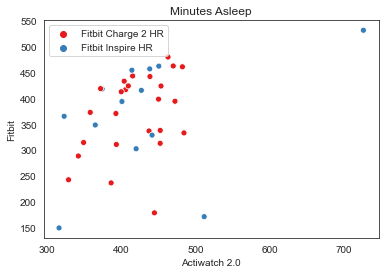

In [189]:
ax = sns.scatterplot(x = 'MinutesAsleep_act', y = 'MinutesAsleep_fit', hue=sleepStats2Sum.index.get_level_values(1).to_list(), data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Minutes Asleep')

Text(0.5, 1.0, 'Time In Bed')

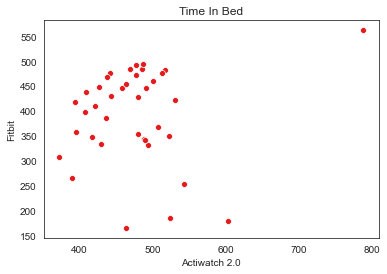

In [190]:
ax = sns.scatterplot(x = 'TimeInBed_act', y = 'TimeInBed_fit', data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Time In Bed')


Text(0.5, 1.0, 'Minutes Awake')

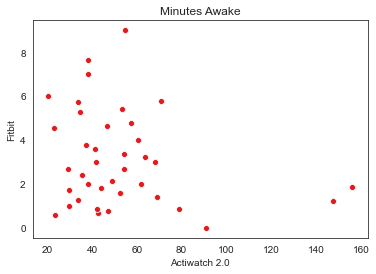

In [191]:
ax = sns.scatterplot(x = 'AwakeDuration_act', y = 'AwakeDuration_fit', data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Minutes Awake')


Text(0.5, 1.0, 'Minutes To Fall Asleep')

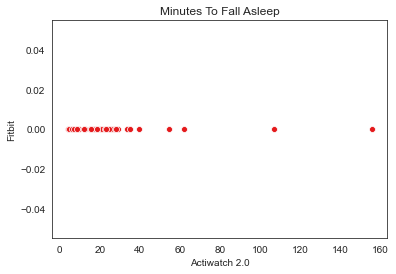

In [192]:
ax = sns.scatterplot(x = 'MinutesToFallAsleep_act', y = 'MinutesToFallAsleep_fit', data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Minutes To Fall Asleep')


Text(0.5, 1.0, 'Sleep Efficiency')

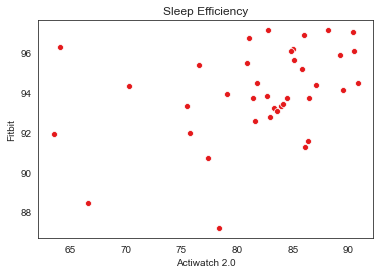

In [193]:
ax = sns.scatterplot(x = 'Efficiency_act', y = 'Efficiency_fit', data = sleepStats2Sum)
ax.set(xlabel='Actiwatch 2.0', ylabel='Fitbit')
ax.set_title('Sleep Efficiency')


## Within-subject sleep summary metric correlations

In [194]:
df[['subject','date', 'MinutesAsleep_act', 'MinutesAsleep_fit']][0:10]

,subject,date,MinutesAsleep_act,MinutesAsleep_fit
0,10011,2019-10-25,474.0,508.0
1,10011,2019-11-04,419.5,450.0
2,10011,2019-11-05,455.5,480.0
3,10011,2019-11-06,363.5,405.0
4,10011,2019-11-07,364.5,373.0
5,10012,2019-10-19,526.5,564.0
6,10012,2019-10-20,479.0,113.0
7,10012,2019-10-20,479.0,527.0
8,10012,2019-10-21,534.0,537.0
9,10012,2019-10-22,355.5,410.0


In [195]:
df[['subject', 'date', 'fitbit_device', 'MinutesAsleep_act', 'MinutesAsleep_fit']].groupby(['subject']).corr()[1::2]

,,MinutesAsleep_act,MinutesAsleep_fit
subject,,,
10011,MinutesAsleep_fit,0.975023,1.0
10012,MinutesAsleep_fit,0.329915,1.0
10014,MinutesAsleep_fit,0.156465,1.0
10016,MinutesAsleep_fit,0.357833,1.0
10024,MinutesAsleep_fit,0.841406,1.0
10025,MinutesAsleep_fit,0.610483,1.0
10033,MinutesAsleep_fit,0.252760,1.0
10035,MinutesAsleep_fit,0.953729,1.0
10038,MinutesAsleep_fit,0.584274,1.0


In [209]:
df[['subject','date', 'MinutesAsleep_act', 'MinutesAsleep_fit']].groupby(['subject']).corr()[1::2].describe()


,MinutesAsleep_act,MinutesAsleep_fit
count,38.000000,38.0
mean,0.514494,1.0
std,0.345693,0.0
min,-0.173383,1.0
25%,0.267909,1.0
50%,0.568213,1.0
75%,0.819066,1.0
max,1.000000,1.0


### Minutes Asleep Correlation within Subjects and by Fitbit Device

In [210]:
df[['subject','date', 'fitbit_device', 'MinutesAsleep_act', 'MinutesAsleep_fit']].groupby(['fitbit_device', 'subject']).corr()[1::2].groupby('fitbit_device').describe()


MinutesAsleep_act                                         \
                               count     mean       std       min       25%   
fitbit_device                                                                 
Fitbit Charge 2 HR              25.0  0.45504  0.339405 -0.134933  0.192168   
Fitbit Inspire HR               13.0  0.62883  0.341398 -0.173383  0.441542   

                                                 MinutesAsleep_fit            \
                         50%       75%       max             count mean  std   
fitbit_device                                                                  
Fitbit Charge 2 HR  0.429965  0.735760  0.992781              25.0  1.0  0.0   
Fitbit Inspire HR   0.573859  0.976817  1.000000              13.0  1.0  0.0   

                                             
                    min  25%  50%  75%  max  
fitbit_device                                
Fitbit Charge 2 HR  1.0  1.0  1.0  1.0  1.0  
Fitbit Inspire HR   1.0  1.0  1.0  1.0  1.0

In [197]:
df[['subject','date', 'TimeInBed_act', 'TimeInBed_fit']].groupby(['subject']).corr()[1::2].describe()


,TimeInBed_act,TimeInBed_fit
count,38.000000,38.0
mean,0.463260,1.0
std,0.383943,0.0
min,-0.236158,1.0
25%,0.175271,1.0
50%,0.507612,1.0
75%,0.750281,1.0
max,1.000000,1.0


In [198]:
df[['subject','date', 'AwakeDuration_act', 'AwakeDuration_fit']].groupby(['subject']).corr()[1::2].describe()


,AwakeDuration_act,AwakeDuration_fit
count,37.000000,37.0
mean,0.045252,1.0
std,0.323117,0.0
min,-1.000000,1.0
25%,-0.094744,1.0
50%,0.027774,1.0
75%,0.255058,1.0
max,0.757583,1.0


In [199]:
df[['subject','date', 'MinutesToFallAsleep_act', 'MinutesToFallAsleep_fit']].groupby(['subject']).corr()[1::2].describe()


,MinutesToFallAsleep_act,MinutesToFallAsleep_fit
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [200]:
df[['subject','date', 'Efficiency_act', 'Efficiency_fit']].groupby(['subject']).corr()[1::2].describe()


,Efficiency_act,Efficiency_fit
count,38.000000,38.0
mean,0.056820,1.0
std,0.347680,0.0
min,-1.000000,1.0
25%,-0.129679,1.0
50%,0.025748,1.0
75%,0.325614,1.0
max,0.562357,1.0


,r,dof,pval,CI95%,power
rm_corr,0.382094,455,2.467729e-17,"[0.3, 0.46]",1.0


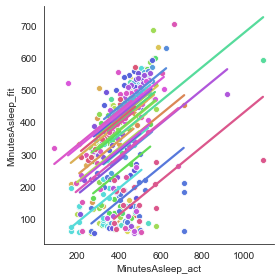

In [120]:
pg.plot_rm_corr(data=df, x='MinutesAsleep_act', y='MinutesAsleep_fit', subject='subject')
pg.rm_corr(data=df, x='MinutesAsleep_act', y='MinutesAsleep_fit', subject='subject')

,r,dof,pval,CI95%,power
rm_corr,0.266058,455,7.625941e-09,"[0.18, 0.35]",0.999942


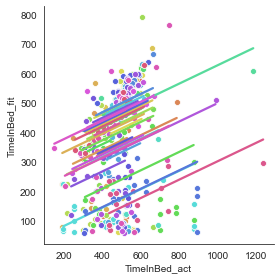

In [121]:
pg.plot_rm_corr(data=df, x='TimeInBed_act', y='TimeInBed_fit', subject='subject')
pg.rm_corr(data=df, x='TimeInBed_act', y='TimeInBed_fit', subject='subject')


,r,dof,pval,CI95%,power
rm_corr,0.029493,455,0.529409,"[-0.06, 0.12]",0.096405


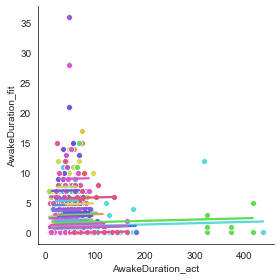

In [122]:
pg.plot_rm_corr(data=df, x='AwakeDuration_act', y='AwakeDuration_fit', subject='subject')
pg.rm_corr(data=df, x='AwakeDuration_act', y='AwakeDuration_fit', subject='subject')


/usr/local/lib/python3.7/site-packages/pingouin/parametric.py:992: RuntimeWarning: invalid value encountered in double_scalars
  fval = msbetween / mserror
/usr/local/lib/python3.7/site-packages/pingouin/parametric.py:998: RuntimeWarning: invalid value encountered in double_scalars
  np2 = ssbetween / (ssbetween + sserror)  # = ssbetween / sstotal
/usr/local/lib/python3.7/site-packages/pingouin/parametric.py:1686: RuntimeWarning: invalid value encountered in double_scalars
  f_c = ms_c / ms_w
/usr/local/lib/python3.7/site-packages/pingouin/parametric.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  f_b = ms_b / ms_w
/usr/local/lib/python3.7/site-packages/pingouin/parametric.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  np2_b = ss_b / (ss_b + ss_w)
/usr/local/lib/python3.7/site-packages/pingouin/parametric.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  np2_c = ss_c / (ss_c + ss_w)
/usr/local/lib/python3.7/site-packag

AssertionError: 

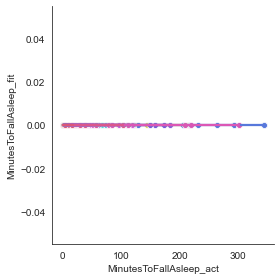

In [124]:
pg.plot_rm_corr(data=df, x='MinutesToFallAsleep_act', y='MinutesToFallAsleep_fit', subject='subject')
pg.rm_corr(data=df, x='MinutesToFallAsleep_act', y='MinutesToFallAsleep_fit', subject='subject')


,r,dof,pval,CI95%,power
rm_corr,0.018701,455,0.690104,"[-0.07, 0.11]",0.068381


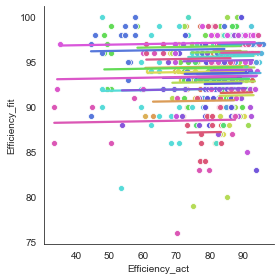

In [125]:
pg.plot_rm_corr(data=df, x='Efficiency_act', y='Efficiency_fit', subject='subject')
pg.rm_corr(data=df, x='Efficiency_act', y='Efficiency_fit', subject='subject')